In [161]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

In [163]:
df = pd.read_csv("California_Houses.csv")


In [132]:
X = df.drop("Median_House_Value", axis=1)
y = df["Median_House_Value"]

In [ ]:

for feature in X.columns:
    plt.figure()
    plt.scatter(df[feature], y, alpha=0.1)
    plt.xlabel(feature)
    plt.ylabel("Median House Value")
    plt.title(f"{feature} vs Median House Value")
    plt.show()

In [217]:

df = pd.read_csv("California_Houses.csv")
df_filtered = df[df['Median_House_Value'] < 500000]

df_filtered = df_filtered[df_filtered['Tot_Rooms']< 20000]
df_filtered = df_filtered[df_filtered['Tot_Bedrooms'] <= df_filtered['Tot_Rooms']]
df_filtered = df_filtered[df_filtered['Median_Income']< 11]

df_filtered = df_filtered[df_filtered['Households'] > 0]
df_filtered = df_filtered[df_filtered['Households'] < 2500]
df_filtered['Tot_Rooms_log'] = np.log1p(df_filtered['Tot_Rooms'])
df_filtered['Tot_Bedrooms_log'] = np.log1p(df_filtered['Tot_Bedrooms'])
df_filtered['Population_log'] = np.log1p(df_filtered['Population'])
df_filtered = df_filtered[df_filtered['Tot_Bedrooms_log'] > 3]
df_filtered = df_filtered.drop(['Tot_Rooms','Tot_Bedrooms','Population'], axis=1)
df = df_filtered


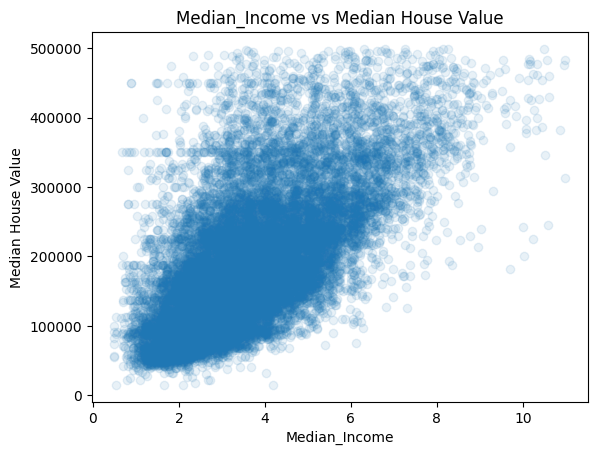

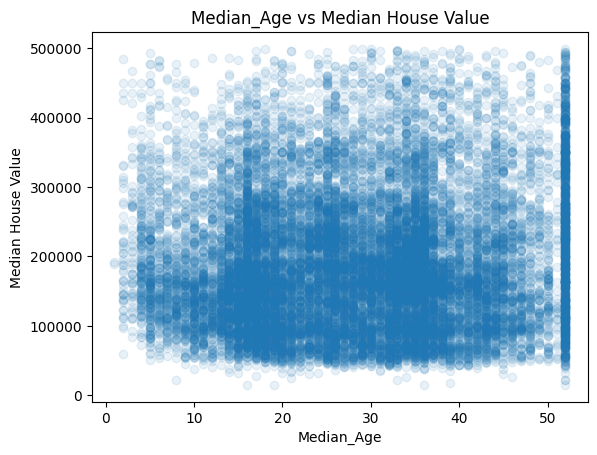

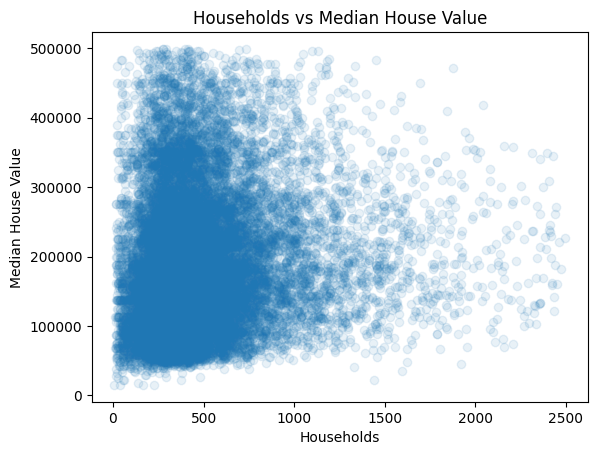

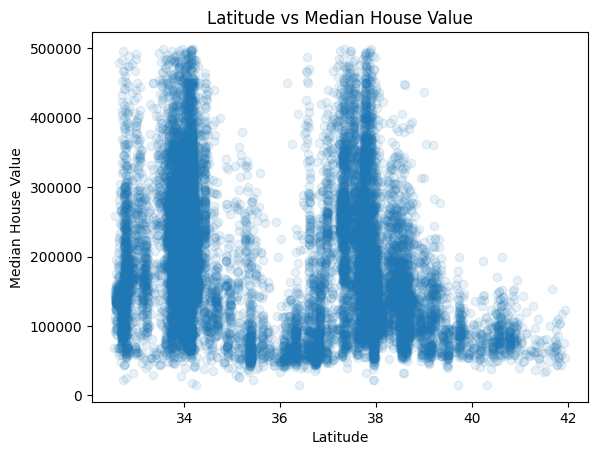

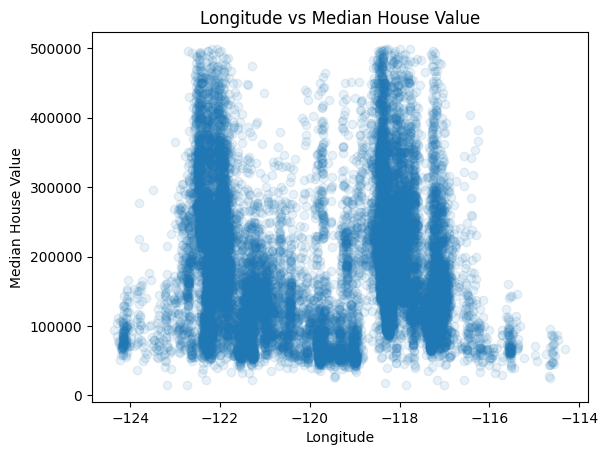

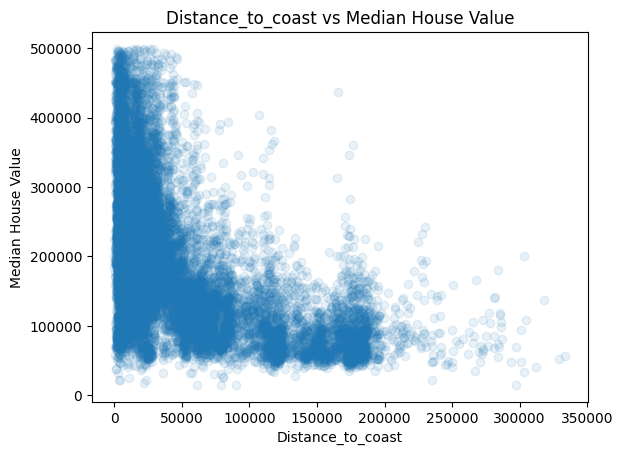

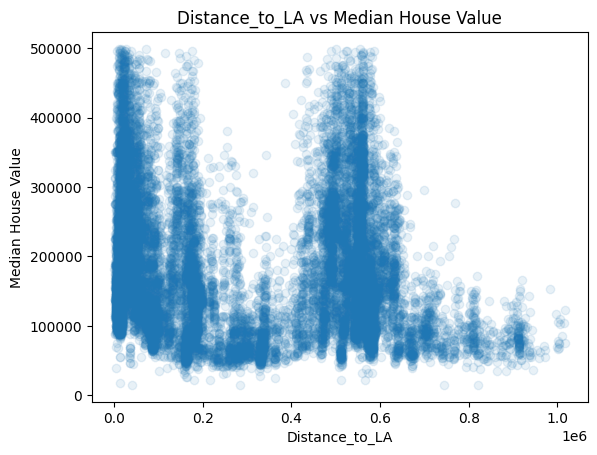

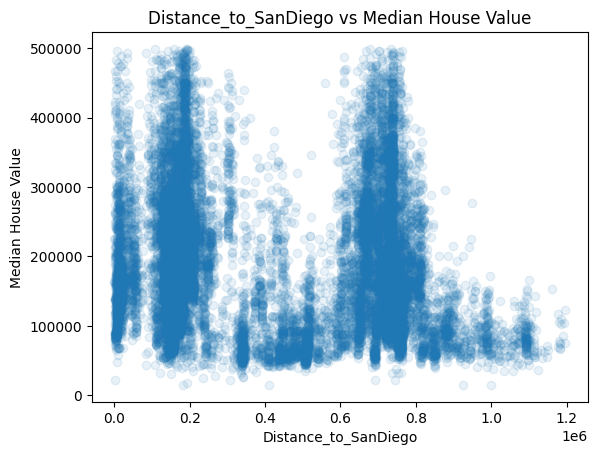

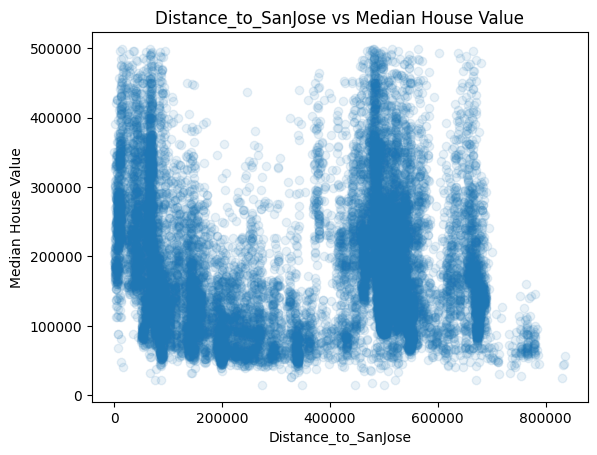

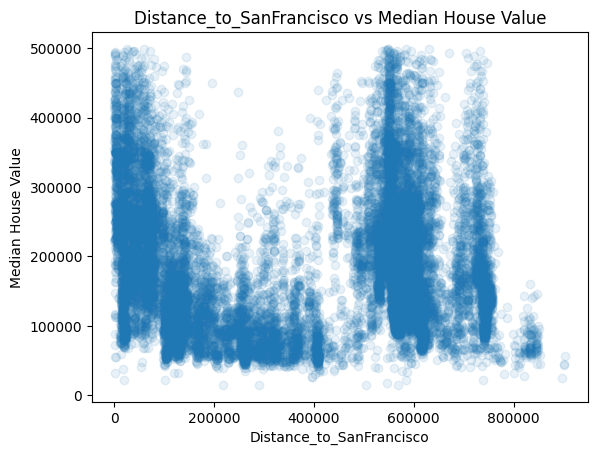

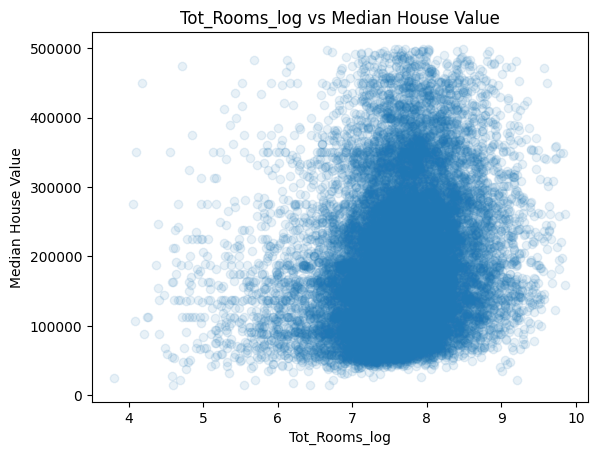

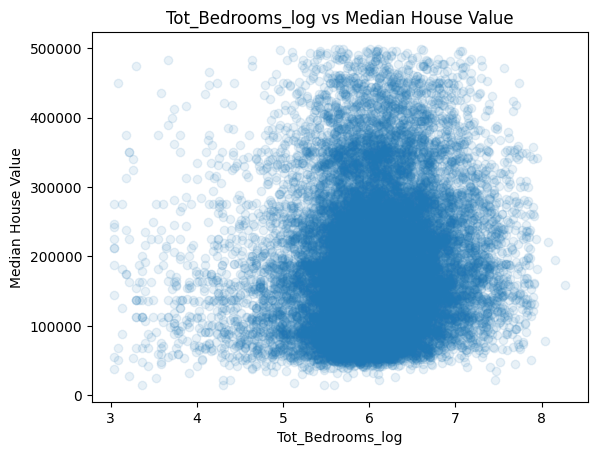

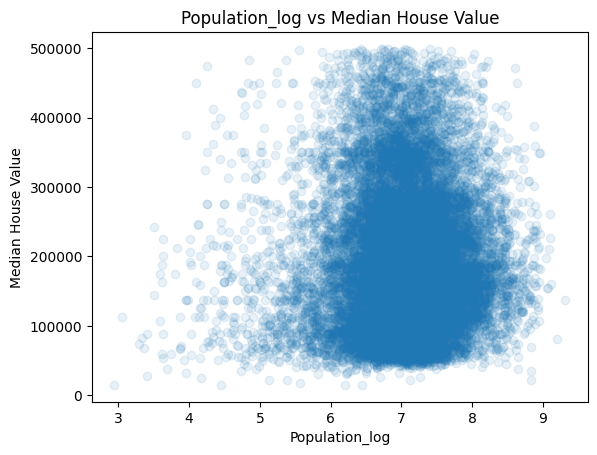

In [218]:
X = df.drop("Median_House_Value", axis=1)
y = df["Median_House_Value"]

for feature in X.columns:
    plt.figure()
    plt.scatter(df[feature], y, alpha=0.1)
    plt.xlabel(feature)
    plt.ylabel("Median House Value")
    plt.title(f"{feature} vs Median House Value")
    plt.show()

In [219]:
X = df.drop("Median_House_Value", axis=1)
y = df["Median_House_Value"]

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)


In [220]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)


In [207]:
def evaluate(model, X, y):
    y_pred = model.predict(X)
    return mean_squared_error(y, y_pred), r2_score(y, y_pred), y_pred


def plot_actual_vs_pred(y_true, y_pred, title):
    plt.figure()
    plt.scatter(y_true, y_pred)
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()])
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(title)
    plt.show()


def plot_residuals(y_pred, residuals, title):
    plt.figure()
    plt.scatter(y_pred, residuals)
    plt.axhline(0)
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(title)
    plt.show()


Linear Regression
MSE: 3177969065.023242
R² : 0.6676711487043725


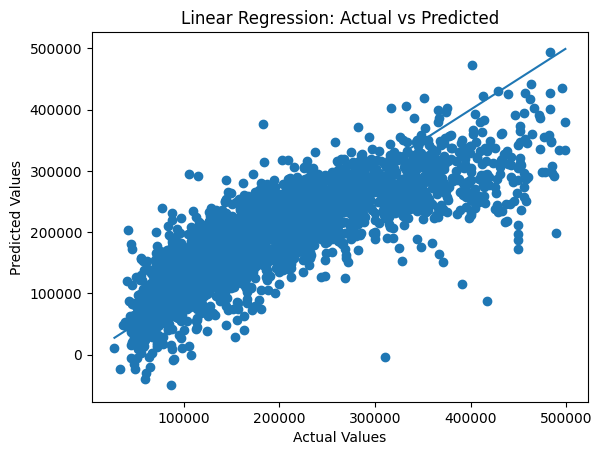

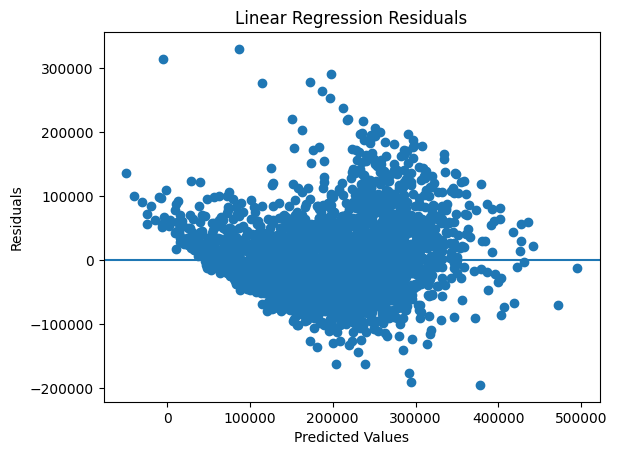

In [221]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

lin_mse, lin_r2, lin_pred = evaluate(lin_reg, X_test_scaled, y_test)

print("Linear Regression")
print("MSE:", lin_mse)
print("R² :", lin_r2)

plot_actual_vs_pred(y_test, lin_pred, "Linear Regression: Actual vs Predicted")
plot_residuals(lin_pred, y_test - lin_pred, "Linear Regression Residuals")


Ridge Regression (Batch GD)
Best alpha: 1
MSE: 3389633810.6328354
R² : 0.6426949611656513


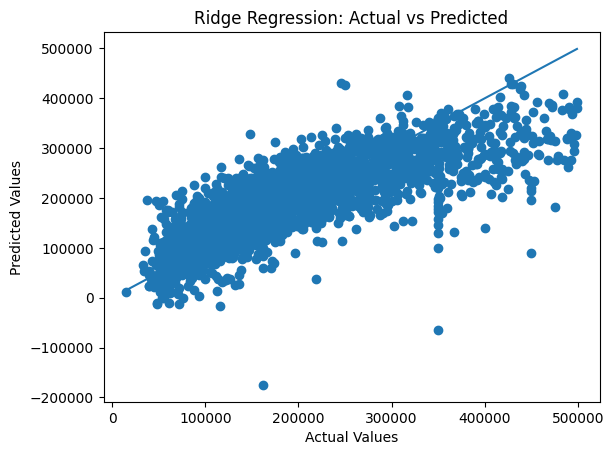

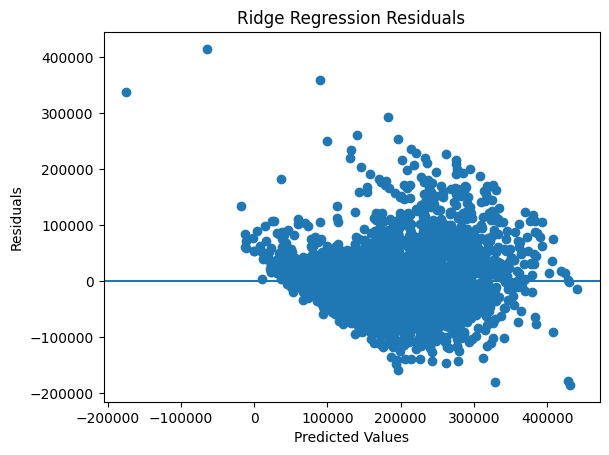

In [209]:
alphas = [0.01, 0.1, 1, 10]
best_alpha = min(alphas, key=lambda a:
                 mean_squared_error(
                     y_val,
                     Ridge(alpha=a).fit(X_train_scaled, y_train).predict(X_val_scaled)
                 ))

ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train_scaled, y_train)

ridge_mse, ridge_r2, ridge_pred = evaluate(ridge, X_test_scaled, y_test)

print("Ridge Regression (Batch GD)")
print("Best alpha:", best_alpha)
print("MSE:", ridge_mse)
print("R² :", ridge_r2)

plot_actual_vs_pred(y_test, ridge_pred, "Ridge Regression: Actual vs Predicted")
plot_residuals(ridge_pred, y_test - ridge_pred, "Ridge Regression Residuals")


Lasso Regression (Batch GD)
Best alpha: 0.01
MSE: 3390073813.9223814
R² : 0.6426485799335651


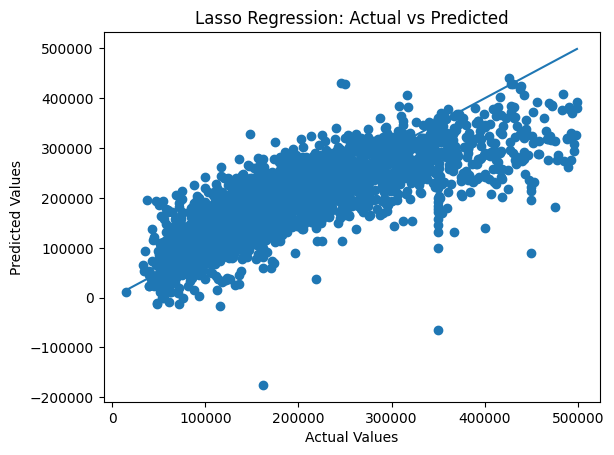

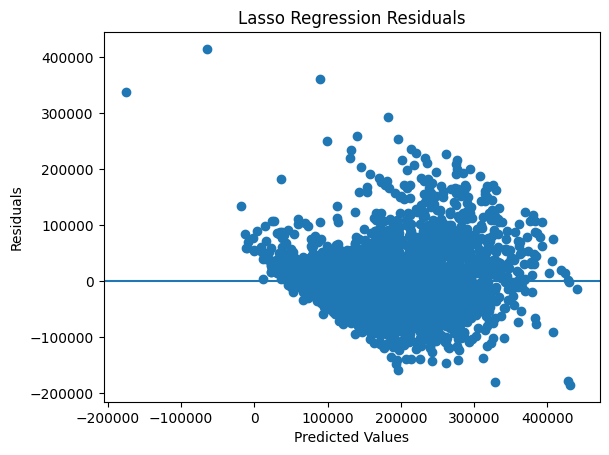

In [210]:
best_alpha = min(alphas, key=lambda a:
                 mean_squared_error(
                     y_val,
                     Lasso(alpha=a, max_iter=5000).fit(X_train_scaled, y_train).predict(X_val_scaled)
                 ))

lasso = Lasso(alpha=best_alpha, max_iter=5000)
lasso.fit(X_train_scaled, y_train)

lasso_mse, lasso_r2, lasso_pred = evaluate(lasso, X_test_scaled, y_test)

print("Lasso Regression (Batch GD)")
print("Best alpha:", best_alpha)
print("MSE:", lasso_mse)
print("R² :", lasso_r2)

plot_actual_vs_pred(y_test, lasso_pred, "Lasso Regression: Actual vs Predicted")
plot_residuals(lasso_pred, y_test - lasso_pred, "Lasso Regression Residuals")


SGD Ridge Regression
MSE: 3435056012.74708
R² : 0.6379069567389012


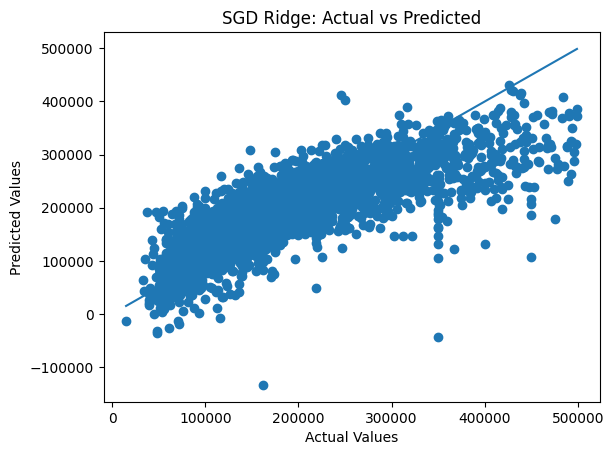

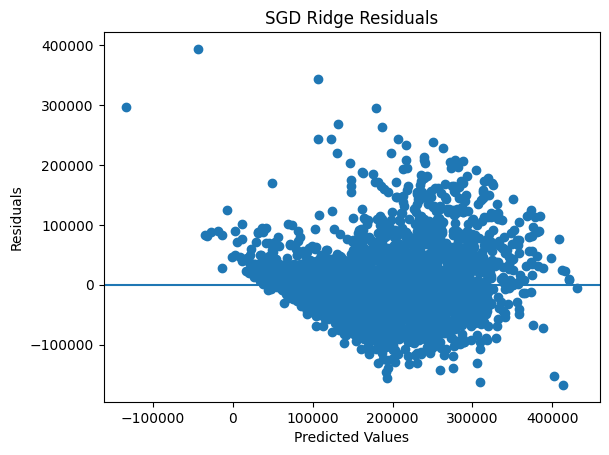

In [211]:
sgd = SGDRegressor(
    penalty="l2",
    alpha=best_alpha,
    learning_rate="invscaling",
    eta0=0.01,
    max_iter=2000,
    random_state=42
)

sgd.fit(X_train_scaled, y_train)

sgd_mse, sgd_r2, sgd_pred = evaluate(sgd, X_test_scaled, y_test)

print("SGD Ridge Regression")
print("MSE:", sgd_mse)
print("R² :", sgd_r2)

plot_actual_vs_pred(y_test, sgd_pred, "SGD Ridge: Actual vs Predicted")
plot_residuals(sgd_pred, y_test - sgd_pred, "SGD Ridge Residuals")


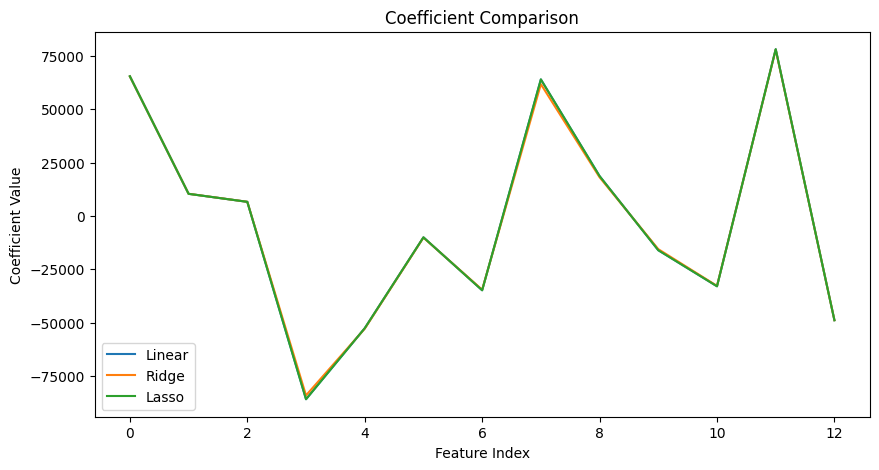

In [212]:
plt.figure(figsize=(10,5))
plt.plot(lin_reg.coef_, label="Linear")
plt.plot(ridge.coef_, label="Ridge")
plt.plot(lasso.coef_, label="Lasso")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Comparison")
plt.legend()
plt.show()
